In [17]:
import numpy as np
import cv2 
import skimage
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from skimage.feature import Cascade
from skimage import data
trained_model=data.lbp_frontal_face_cascade_filename()
from skimage.filters import gaussian

## **Test_Image**

In [117]:
img=cv2.imread("/content/5fa53707e5529.jpeg")

In [118]:
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

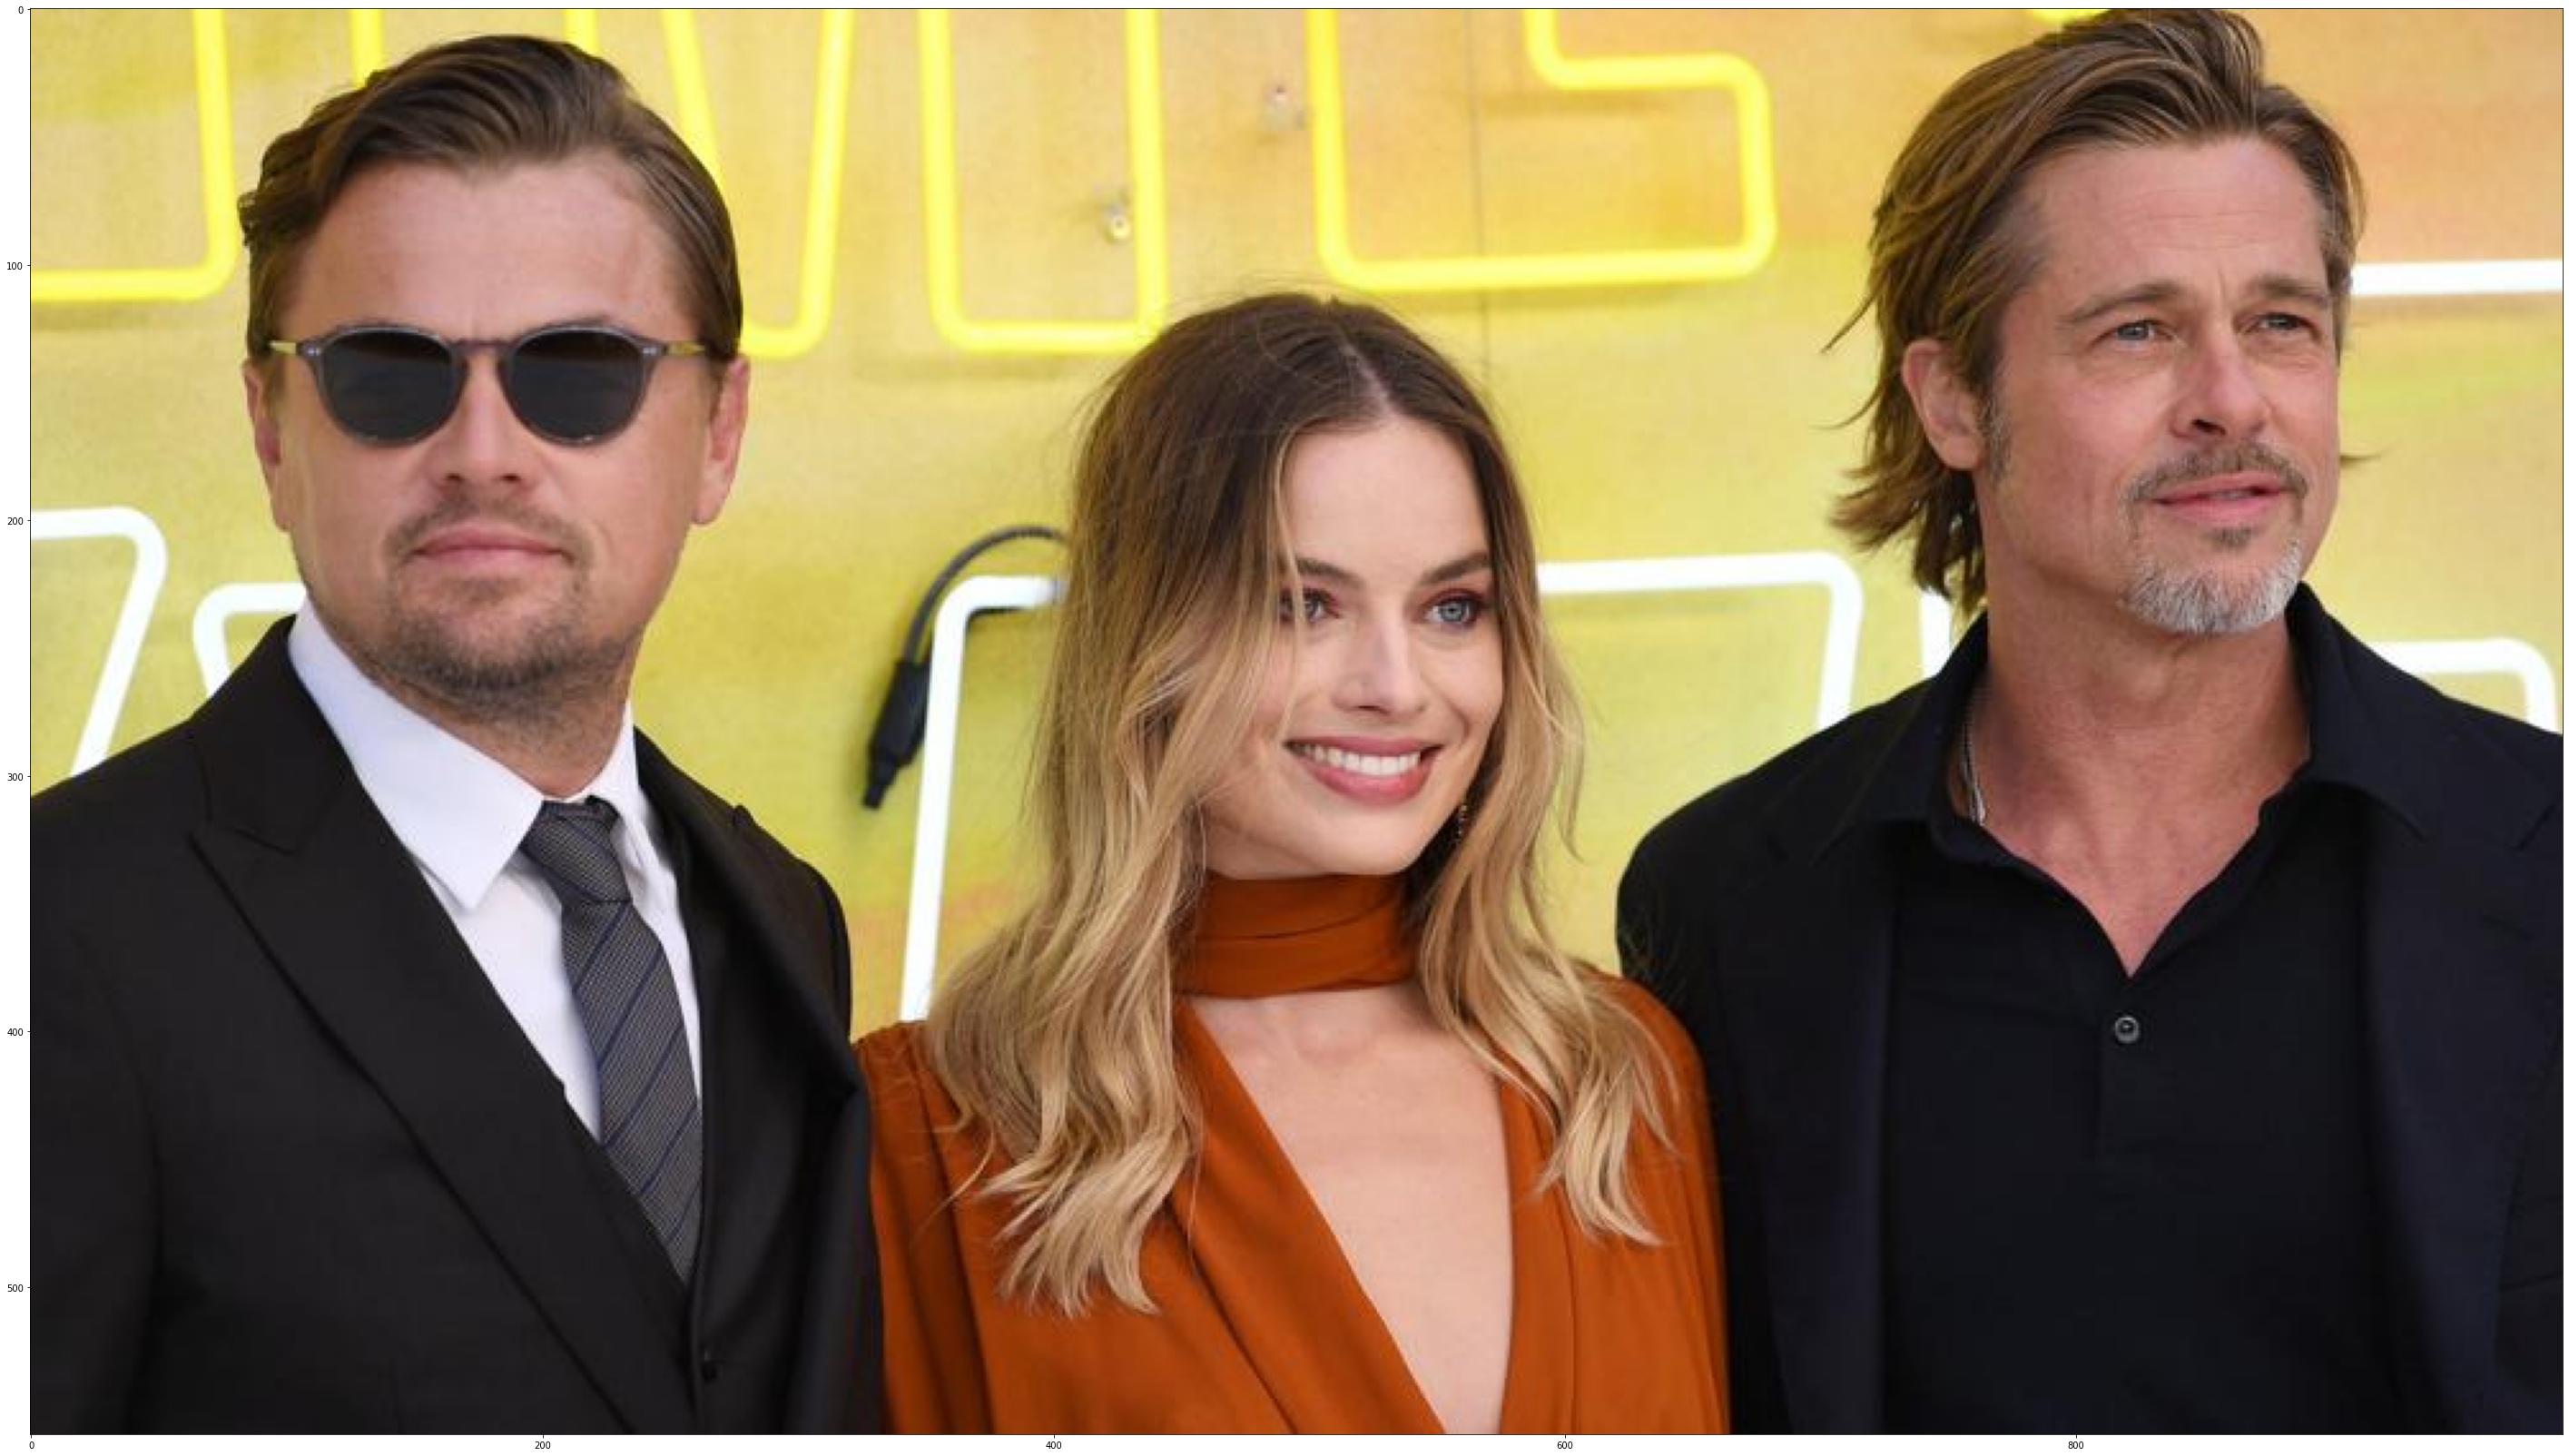

In [119]:
plt.rcParams["figure.figsize"] = (50,50)
plt.imshow(img)

In [120]:
img=skimage.color.rgb2gray(img)
Detector=Cascade(trained_model)
detected=Detector.detect_multi_scale(img,scale_factor=1.15, step_ratio=1,
                                       min_size=(30, 30),
                                       max_size=(200, 200))

In [122]:
def get_face(box,image):
  x,y=box['r'],box['c']
  width,height=x+box['width'],y+box['height']
  return image[x:width,y:height]



In [123]:
def merge_blurred_face(box,image,blurred_face):
    x,y=box['r'],box['c']
    width,height=x+box['width'],y+box['height']
    full_img=image[x:width,y:height]=blurred_face
    return full_img
  


In [124]:
for f in detected:
  face= get_face(f,img)
  face_gaussian=gaussian(face,multichannel=True,sigma=30)
  merge_blurred_face(f,img,face_gaussian)

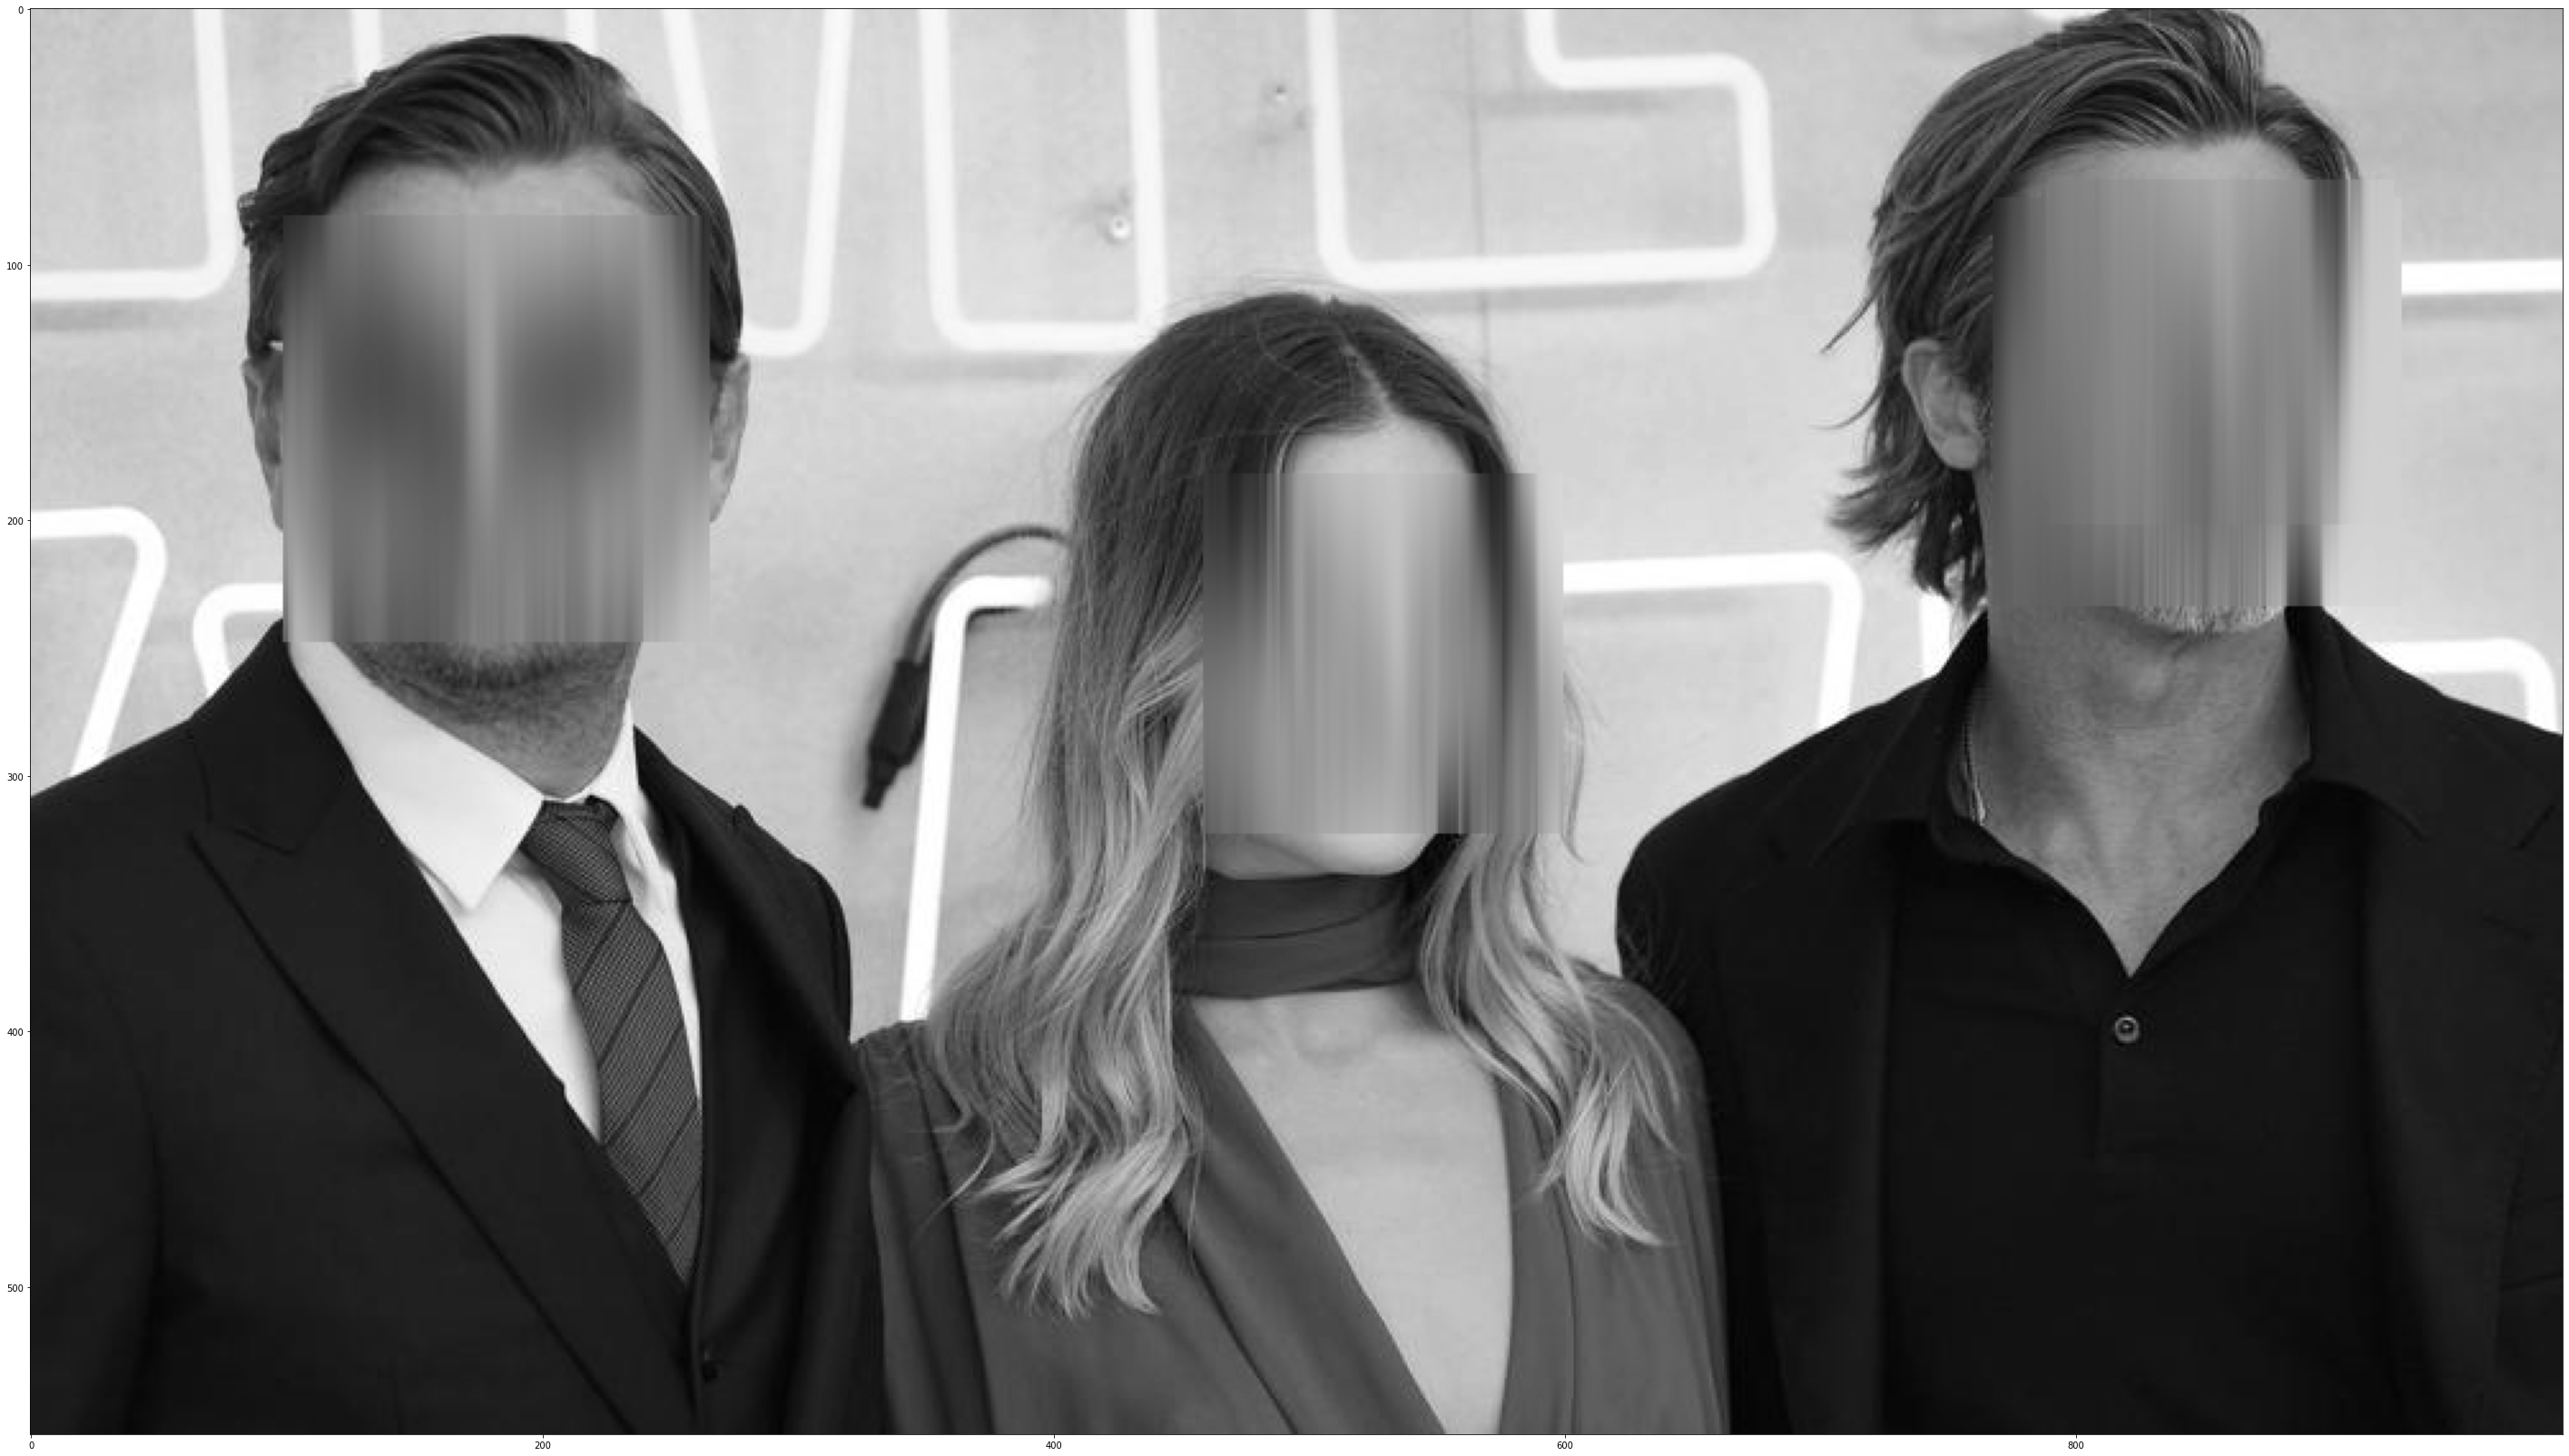

In [128]:
plt.imshow(img,cmap='gray')